<a href="https://colab.research.google.com/github/OmamaSajid/deeplearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
transforms=transforms.ToTensor()

In [3]:
train_data=datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transforms)

100%|██████████| 9.91M/9.91M [00:00<00:00, 54.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.62MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.74MB/s]


In [4]:
test_data=datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transforms)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
cd ../

/


In [7]:
ls

bin@                        home/    NGC-DL-CONTAINER-LICENSE  srv/
boot/                       kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/
etc/                        mnt/     sbin@


In [8]:
cd cnn_data

/cnn_data


In [9]:
ls

MNIST/


In [10]:
cd ../


/


In [11]:
cd content/

/content


In [12]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [13]:
#working of convolutional layer
conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)

In [14]:
for i,(X_train,y_train) in enumerate(train_data):
  break

In [15]:
X_train.shape

torch.Size([1, 28, 28])

In [16]:
x=X_train.view(1,1,28,28)  #batch 1 image 1 of size 28*28

In [17]:
x=F.relu(conv1(x))

In [18]:
x.shape  #one image 6 feature maps of size 26*26

torch.Size([1, 6, 26, 26])

In [19]:
x=F.max_pool2d(x,2,2)  # 2 and 2 are kernel size and stride

In [20]:
x.shape        #26/2=13

torch.Size([1, 6, 13, 13])

In [21]:
x=F.relu(conv2(x))

In [22]:
x.shape

torch.Size([1, 16, 11, 11])

In [23]:
x=F.max_pool2d(x,2,2)

In [24]:
x.shape #11/2

torch.Size([1, 16, 5, 5])

In [33]:
#model
class convulationalmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)
    self.fc1=nn.Linear(5*5*16,120)#last may jo torch suze hai wo 5*5 size hota hai aur 16 output jo ham ny define kiye
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10) #we have 10 classes in the dataset we are using so it has to end here
  def forward(self,X):
    X=F.relu(self.conv1(X))
    X=F.max_pool2d(X,2,2)
    X=F.relu(self.conv2(X))
    X=F.max_pool2d(X,2,2)
    X=X.view(-1,5*5*16) #-1 to vary the batch size (flatten)
    #we can have many conv and pooling layer but then it needs to be flatten and move to fc layers for decision
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return F.log_softmax(X,dim=1)  #to return probability used in classificafion

In [34]:
torch.manual_seed(41)
model=convulationalmodel()
model

convulationalmodel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001) #smaller the rater longer gonna take to train

In [37]:
import time
start_time=time.time()
ephochs=5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
for i in range(ephochs):
  trn_correct=0
  tst_correct=0
  for b,(x_train,y_train) in enumerate(train_loader):
    b+=1 #start from batch 1
    y_pred=model(x_train)   #not flatten 2d cuz our conv layer is conv2d
    loss=criterion(y_pred,y_train)
    predicted=torch.max(y_pred.data,1)[1]
    batch_correct=(predicted==y_train).sum()
    trn_correct+=batch_correct
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b%600==0:
      print(f'ephoch{i}, batch {b},loss {loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_correct)
  with torch.no_grad():         # no grad cuz we only want testing not updating weights and biases with test
    for b,(x_test,y_test) in enumerate(test_loader):
      y_val=model(x_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_correct=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_correct)




current_time=time.time()
total_time=current_time-start_time
print(f'total time for training: {total_time/60} mins')

ephoch0, batch 600,loss 0.00036099221324548125
ephoch0, batch 1200,loss 0.0001712304074317217
ephoch0, batch 1800,loss 0.0005378525820560753
ephoch0, batch 2400,loss 0.027378559112548828
ephoch0, batch 3000,loss 0.0002596829435788095
ephoch0, batch 3600,loss 8.657989383209497e-05
ephoch0, batch 4200,loss 0.00040106248343363404
ephoch0, batch 4800,loss 1.2349883036222309e-05
ephoch0, batch 5400,loss 0.00046615247265435755
ephoch0, batch 6000,loss 0.000162848416948691
ephoch1, batch 600,loss 6.399912672350183e-05
ephoch1, batch 1200,loss 0.0002539866545703262
ephoch1, batch 1800,loss 0.0003175207821186632
ephoch1, batch 2400,loss 8.683211490279064e-05
ephoch1, batch 3000,loss 0.00015392867499031126
ephoch1, batch 3600,loss 0.12387670576572418
ephoch1, batch 4200,loss 0.00015394852380268276
ephoch1, batch 4800,loss 0.00032526275026611984
ephoch1, batch 5400,loss 0.08193918317556381
ephoch1, batch 6000,loss 1.2692201137542725
ephoch2, batch 600,loss 0.0010589142329990864
ephoch2, batch 120

In [43]:
test_data[4143] #gives tensor

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [44]:
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [45]:
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

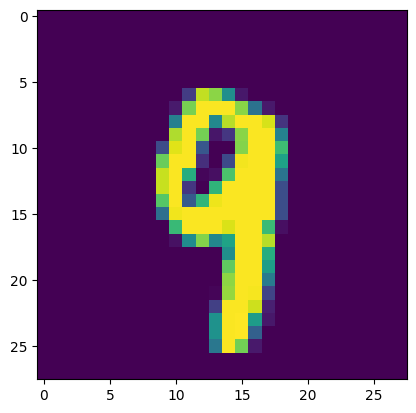

In [46]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [47]:
model.eval()
with torch.no_grad():
  new_prediction=model(test_data[4143][0].view(1,1,28,28))


In [48]:
new_prediction

tensor([[-2.8713e+01, -2.8914e+01, -2.8284e+01, -2.4172e+01, -1.4805e+01,
         -2.2936e+01, -4.6004e+01, -1.8365e+01, -2.0018e+01, -3.5763e-07]])

In [49]:
new_prediction.argmax()

tensor(9)

In [53]:
test_data[1925][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

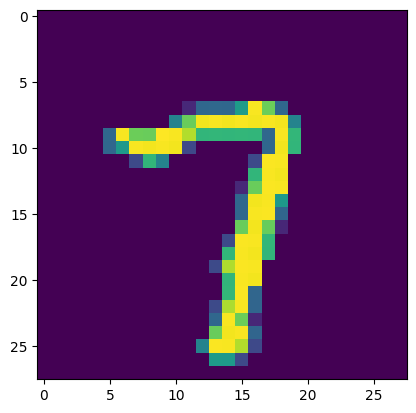

In [52]:
plt.imshow(test_data[1925][0].reshape(28,28))

In [55]:
model.eval()
with torch.no_grad():
  new_prediction1=model(test_data[1925][0].view(1,1,28,28))

In [56]:
new_prediction1

tensor([[-3.0928e+01, -1.5029e+01, -1.7209e+01, -1.7512e+01, -2.0816e+01,
         -3.0885e+01, -5.3039e+01, -3.5763e-07, -3.1081e+01, -1.8345e+01]])

In [57]:
new_prediction1.argmax()

tensor(7)